In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv("diamonds.csv")

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
df.shape

(53940, 10)

### Univariate Analysis

In [ ]:
num_features = df.select_dtypes(include=['int64','float64'])
print(num_features.columns)

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000276001EAB70>,
      dtype=object)

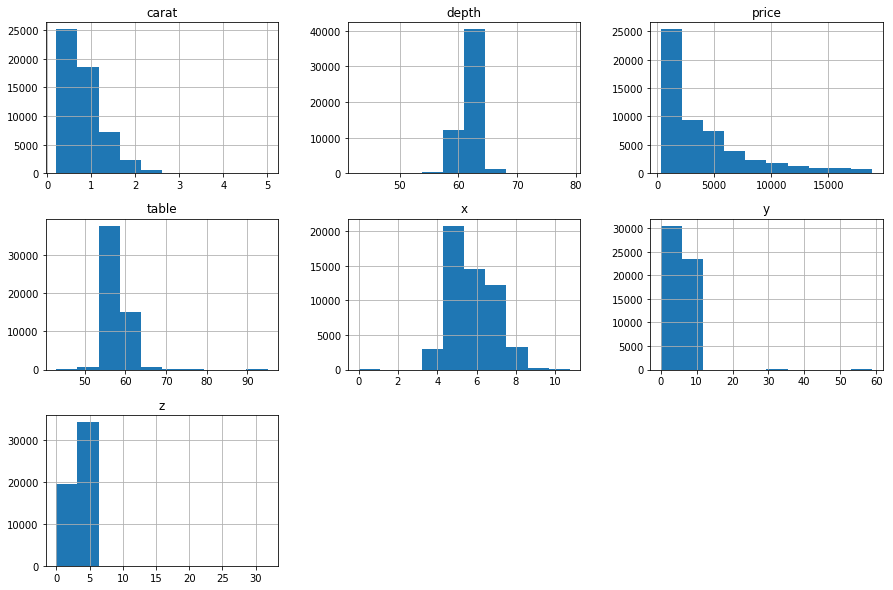

In [ ]:
num_features.hist(figsize=(15,10))

In [ ]:
cat_features = df.select_dtypes(include=['object'])
print(cat_features.columns)

Index(['cut', 'color', 'clarity'], dtype='object')


Text(0.5, 1.0, 'Color vs Cut')

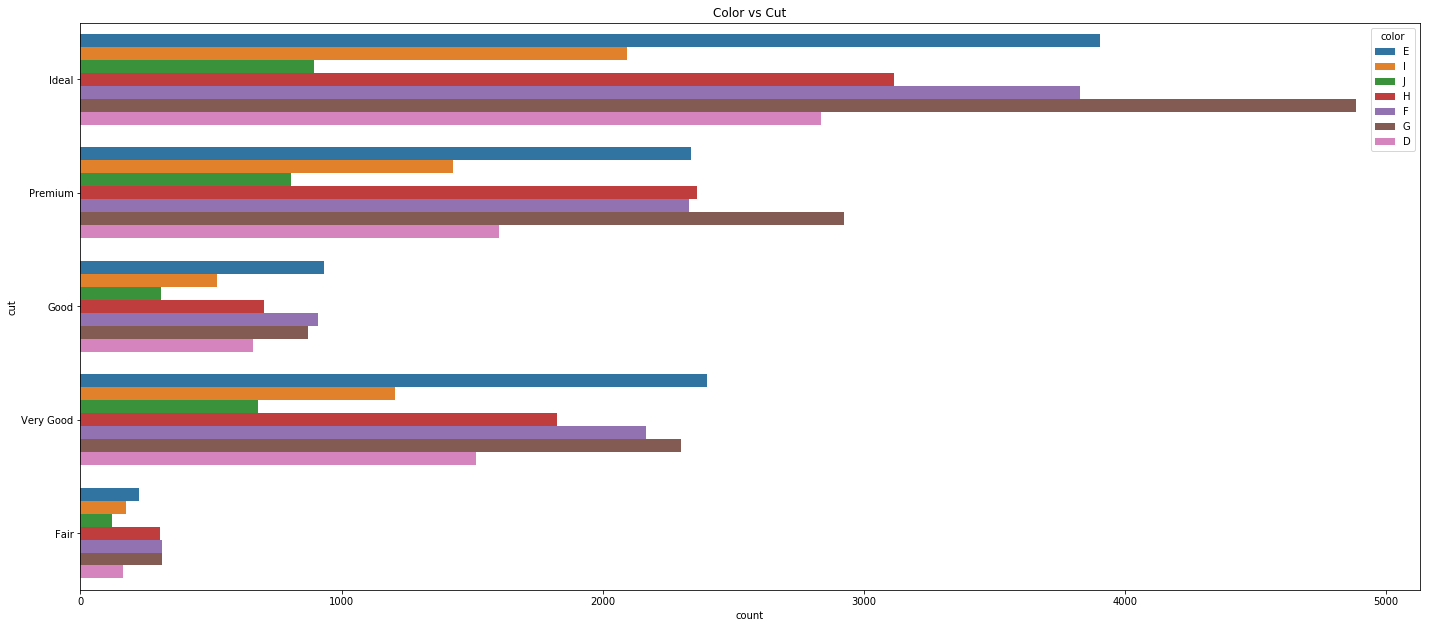

In [ ]:
plt.figure(figsize=(24, 48))

plt.subplot(411)
sns.countplot(y='cut', hue='color', data = cat_features)
plt.title('Color vs Cut')

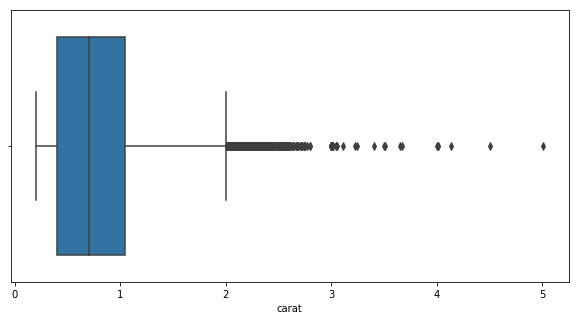

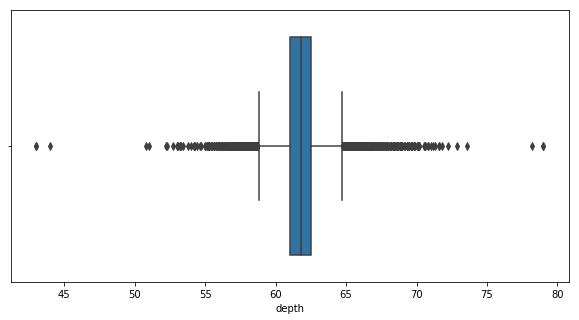

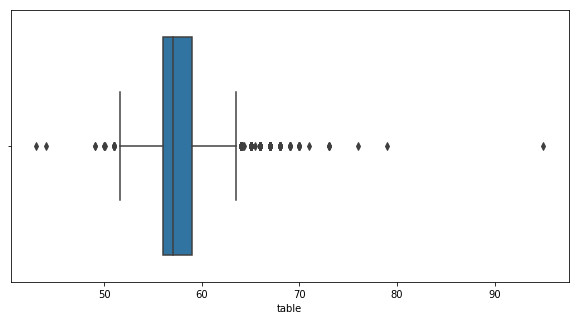

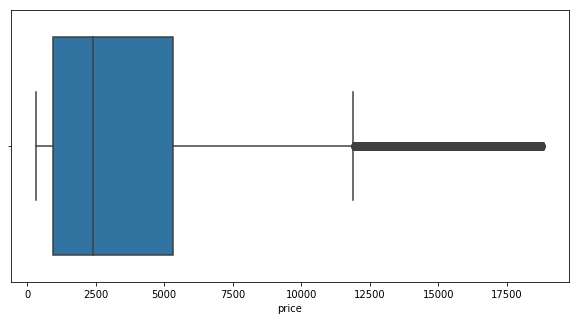

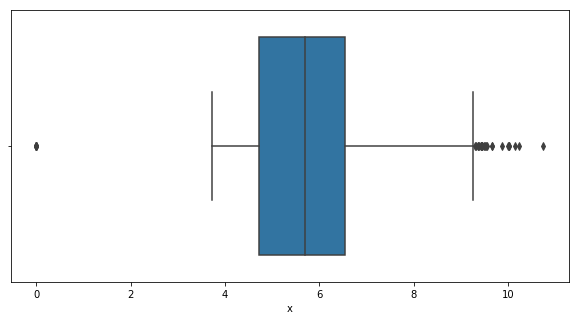

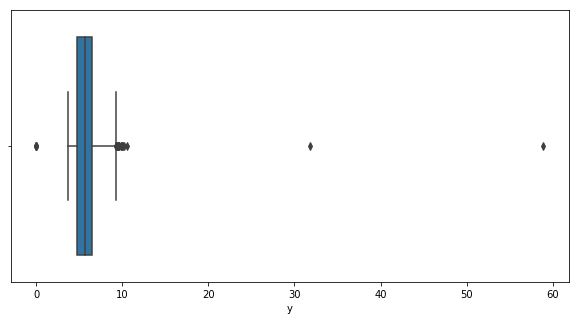

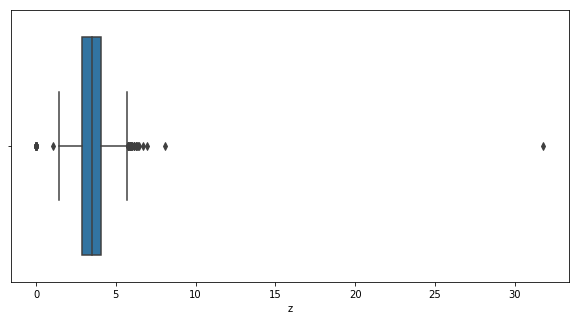

In [ ]:
for num_var in num_features:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df[num_var])

### Bivariate Analysis

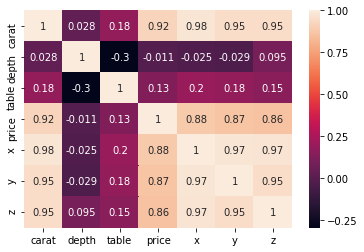

In [ ]:
corr=df.corr()
sns.heatmap(corr,annot=True)

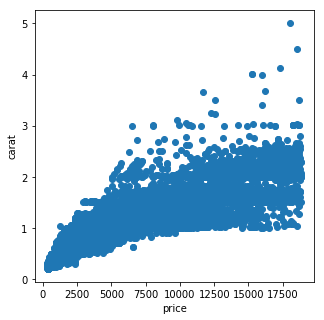

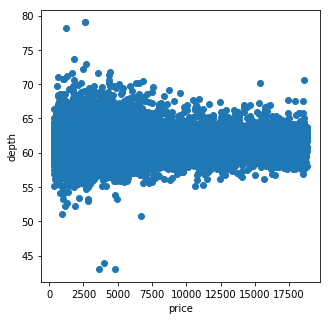

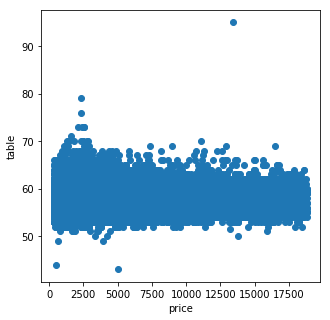

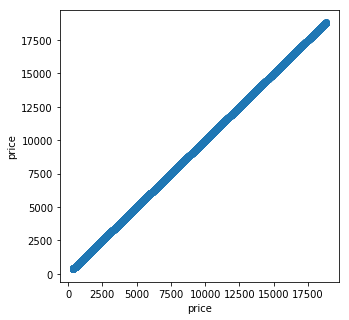

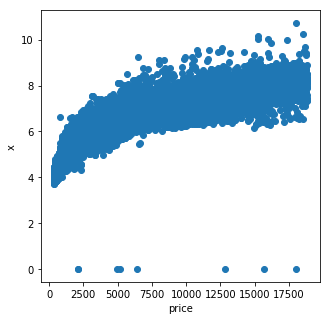

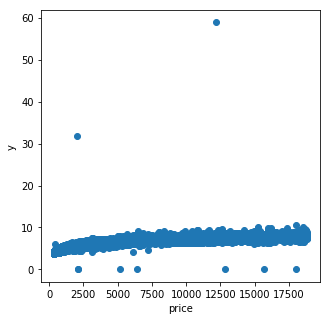

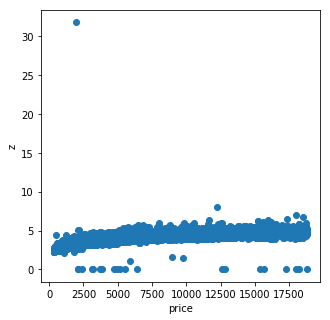

In [ ]:
for num_var in num_features:
    plt.figure(figsize=(5,5))
    plt.xlabel('price')
    plt.ylabel(num_var)
    x=df['price']
    y=df[num_var]
    plt.scatter(x,y)

### Feature Transformation:

In [ ]:
df_cat = pd.get_dummies(cat_features,drop_first=True)
df_cat.head()

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
new_df = pd.concat([num_features, df_cat], axis=1)
new_df.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
# Independent variables
X = new_df.drop(columns = ['price'],axis = 1)
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
y =new_df['price']
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

### Spliting

In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(37758, 23) (37758,)
(16182, 23) (16182,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit_transform(X_train)
scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.07692308, 0.51388889, 0.26923077, ..., 1.        , 0.        ,
        0.        ],
       [0.1995842 , 0.51388889, 0.23076923, ..., 0.        , 0.        ,
        0.        ],
       [0.06444906, 0.56111111, 0.28846154, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.08523909, 0.50833333, 0.23076923, ..., 0.        , 0.        ,
        0.        ],
       [0.04365904, 0.525     , 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.16216216, 0.51666667, 0.44230769, ..., 0.        , 0.        ,
        0.        ]])

### Training the Model

## Linear Regression

Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables such as sales, salary, age, product price, etc.

Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.

Mathematically, we can represent a linear regression as:<br>
y= a0+a1x+ ε


Next →← Prev
Linear Regression in Machine Learning
Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables such as sales, salary, age, product price, etc.

Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.

The linear regression model provides a sloped straight line representing the relationship between the variables. Consider the below image:


Linear Regression in Machine Learning
Mathematically, we can represent a linear regression as:

y= a0+a1x+ ε
Here,

Y= Dependent Variable (Target Variable)
X= Independent Variable (predictor Variable)
a0= intercept of the line (Gives an additional degree of freedom)
a1 = Linear regression coefficient (scale factor to each input value).
ε = random error

The values for x and y variables are training datasets for Linear Regression model representation.

Types of Linear Regression
Linear regression can be further divided into two types of the algorithm:

Simple Linear Regression:
If a single independent variable is used to predict the value of a numerical dependent variable, then such a Linear Regression algorithm is called Simple Linear Regression.
Multiple Linear regression:
If more than one independent variable is used to predict the value of a numerical dependent variable, then such a Linear Regression algorithm is called Multiple Linear Regression.

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
# The coefficients
print('Coefficients: \n', linear_model.coef_)

Coefficients: 
 [11429.11109667   -61.85043906   -24.97115836 -1064.73995859
    16.91185348   -88.76073344   635.80508495   904.12969713
   831.81139346   793.83715021  -198.63108923  -234.50918945
  -456.865391    -955.23107351 -1448.8900703  -2365.6288851
  5284.85155737  3633.61363469  2673.29776692  4555.05587531
  4229.19492082  4949.34554922  4910.16624991]


## Predicting Test Data

In [ ]:
y_test_pred = linear_model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

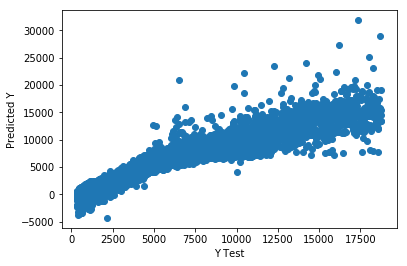

In [ ]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  734.0639993140114
Mean Squared Error:  1275985.7063967127
Root Mean Squared Error:  1129.595372864422


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


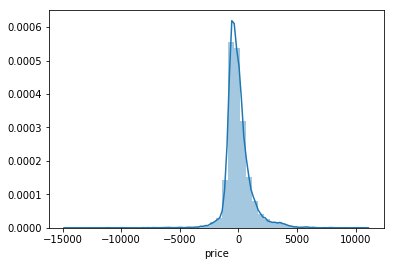

In [ ]:
sns.distplot((y_test-y_test_pred),bins=50);

In [ ]:
coeffecients = pd.DataFrame(linear_model.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
carat,11429.111097
depth,-61.850439
table,-24.971158
x,-1064.739959
y,16.911853
z,-88.760733
cut_Good,635.805085
cut_Ideal,904.129697
cut_Premium,831.811393
cut_Very Good,793.837150


In [ ]:
metrics.r2_score(y_test,y_test_pred)

0.9182661537265939

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model_tree = DecisionTreeRegressor()

In [ ]:
model_tree = DecisionTreeRegressor()

In [ ]:
model_tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [ ]:
y_pred_tree = model_tree.predict(X_test)

In [ ]:
metrics.r2_score(y_test,y_pred_tree)

0.9528972550863747

### Hyperparameter tuning with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict

In [ ]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


grid_cv_dtm = GridSearchCV(model_tree, param_grid, cv=5)

grid_cv_dtm.fit(X_train,y_train)

In [ ]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

In [ ]:
df_new = pd.DataFrame(data=grid_cv_dtm.cv_results_)
df_new.head()

In [ ]:
fig,ax = plt.subplots()
sns.pointplot(data=df_new[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

In [ ]:
best_dtm_model = grid_cv_dtm.best_estimator_

y_pred = best_dtm_model.predict(X_test)
residuals = y_test.flatten() - y_pred


r2_score = best_dtm_model.score(X_test,y_test)
print("R-squared:{:.3f}".format(r2_score))
print("MSE: %.2f" % metrics.mean_squared_error(y_test, y_pred))

## Support vector Regression

In [ ]:
from sklearn.svm import SVR

In [ ]:
model_svr = SVR(kernel='linear', C=100, gamma='auto')

In [ ]:
model_svr.fit(X_train,y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred_svr = model_svr.predict(X_test)

In [ ]:
metrics.r2_score(y_test,y_pred_svr)

0.8923047361220614

## Random forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_rf = RandomForestRegressor() 

In [ ]:
model_rf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred_rf = model_rf.predict(X_test)

In [ ]:
metrics.r2_score(y_test,y_pred_rf)

0.9722603772736632

### Hyperparameter tuning

In [ ]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None],
              'max_features': ['auto', 'log2'], 
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]
             }

In [ ]:
grid_cv_rf = GridSearchCV(estimator = model_rf, param_grid = param_grid,cv = 3, n_jobs = 1, 
                        verbose = 0, return_train_score=True)

grid_cv_rf.fit(X_train, y_train)

In [ ]:
print("R-Squared::{}".format(grid_cv_rf.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_rf.best_params_))

In [ ]:
df_rf = pd.DataFrame(data=grid_cv_rf.cv_results_)
df_rf.head()

In [ ]:
best_rf_model = grid_cv_rf.best_estimator_

y_pred = best_dtm_model.predict(X_test)
residuals = y_test.flatten() - y_pred


r2_score = best_rf_model.score(X_test,y_test)
print("R-squared:{:.3f}".format(r2_score))
print("MSE: %.2f" % metrics.mean_squared_error(y_test, y_pred))

### KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=3)
model_knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [ ]:
y_pred_knn = model_knn.predict(X_test)

In [ ]:
metrics.r2_score(y_test,y_pred_knn)

0.9287014317763067

### Hyperparameter tuning

In [ ]:
# Define our candidate hyperparameters
param = [{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]

In [ ]:
# Search for best hyperparameters
grid = GridSearchCV(estimator=algorithm, param_grid=param, cv=3, scoring='r2')
grid.fit(X_train, y_train)

In [ ]:
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

In [ ]:
grid.cv_results_